# Prequsites

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def displayImage(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    
def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()

# Task1- Numpy

In [4]:
image_1 = np.zeros((300, 300))

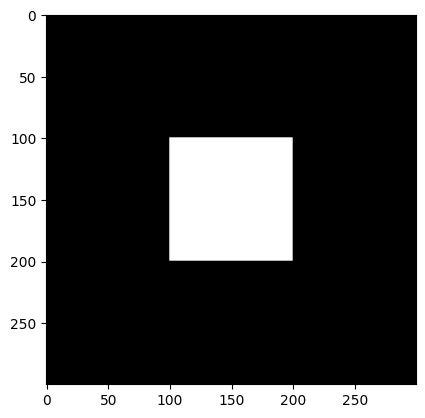

In [5]:
image_1[100:200, 100:200] = 255
displayImage(image_1)

#  Task 2 - Image concatenation 

In [6]:
image_2_1 = cv2.imread("./task-assets/concat1.jpg", 0)
image_2_2 = cv2.imread("./task-assets/concat2.jpg", 0)
image_2_3 = cv2.imread("./task-assets/concat3.jpg", 0)

print("Shape: ", image_2_1.shape)
print("Shape: ", image_2_2.shape)
print("Shape: ", image_2_3.shape)

Shape:  (333, 301)
Shape:  (333, 333)
Shape:  (333, 238)


In [7]:
cv2.imshow("Cat 1", image_2_1)
cv2.imshow("Cat 2", image_2_2)
cv2.imshow("Cat 3", image_2_3)
cv2.waitKey(0)
cv2.destroyAllWindows()

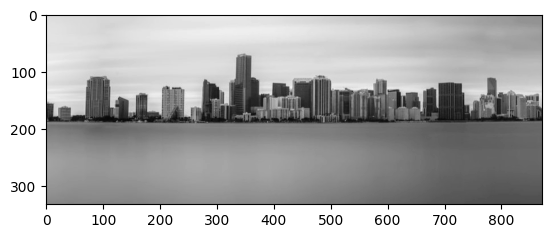

In [8]:
# Create new image of 3 images beside
rows = 333
columns = image_2_1.shape[1] + image_2_2.shape[1] + image_2_3.shape[1]
concatenated = np.zeros((rows, columns))
# Copy each section to corrosponding image
concatenated[:, :image_2_1.shape[1]] = image_2_1
concatenated[:, image_2_1.shape[1] :image_2_1.shape[1] + image_2_2.shape[1]] = image_2_2
concatenated[:, image_2_1.shape[1] + image_2_2.shape[1]:image_2_1.shape[1] + image_2_2.shape[1] + image_2_3.shape[1]] = image_2_3
displayImage(concatenated) 

Trial to show colored image

In [9]:
image_2_1 = cv2.imread("./task-assets/concat1.jpg")
image_2_2 = cv2.imread("./task-assets/concat2.jpg")
image_2_3 = cv2.imread("./task-assets/concat3.jpg")

# Create new image of 3 images beside
rows = 333
columns = image_2_1.shape[1] + image_2_2.shape[1] + image_2_3.shape[1]
concatenated = np.zeros((rows, columns, 3))
# Copy each section to corrosponding image
concatenated[:, :image_2_1.shape[1] , :] = image_2_1
concatenated[:, image_2_1.shape[1] :image_2_1.shape[1] + image_2_2.shape[1], :] = image_2_2
concatenated[:, image_2_1.shape[1] + image_2_2.shape[1]:image_2_1.shape[1] + image_2_2.shape[1] + image_2_3.shape[1], :] = image_2_3

cv2.imshow("Cat coloured", concatenated)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Task 3 - Thresholding

In [10]:
image_3 = cv2.imread("./task-assets/threshold.jpg", 0)
image_3_thresh = np.copy(image_3)
image_3.shape

(1067, 1600)

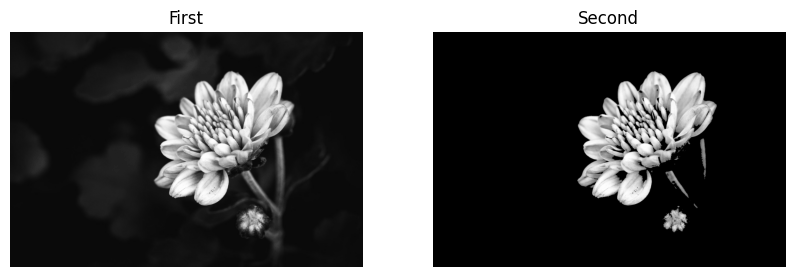

In [11]:
thresh = 100
image_3_thresh[image_3_thresh < thresh] = 0
displayImages(image_3, image_3_thresh)

# Task 4 - Feature Matching

First way

In [46]:
image_4_1 = cv2.imread("./task-assets/feature1.jpeg", 0)
image_4_2 = cv2.imread("./task-assets/feature2.jpeg", 0)

# image_4_1 = cv2.imread("./task-assets/feature1.jpeg")
# image_4_2 = cv2.imread("./task-assets/feature2.jpeg")

# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(image_4_1,None)
kp2, des2 = orb.detectAndCompute(image_4_2,None)

In [47]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
Final_img = cv2.drawMatches(image_4_1,kp1,image_4_2,kp2,matches[:20],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# cv2.imwrite("Features.jpg", Final_img)
new = cv2.resize(Final_img, (1600,900))

cv2.imshow("Feature1", new)
cv2.waitKey(0)
cv2.destroyAllWindows()
# displayImage(Final_img)

Second Way

In [ ]:
image_4_1 = cv2.imread("./task-assets/feature1.jpeg", 0)
image_4_2 = cv2.imread("./task-assets/feature2.jpeg", 0)

# image_4_1 = cv2.imread("./task-assets/feature1.jpeg")
# image_4_2 = cv2.imread("./task-assets/feature2.jpeg")


# Task 5 - Drawing a bounding box

In [13]:
image_5 = cv2.imread("./task-assets/cat3.jpeg", 0)

coord = np.array([[-1, -1], [-1, -1]])
def mouse_click(event, x, y, flags, param):
    global coord
    
    if event == cv2.EVENT_LBUTTONDOWN:
        # Set 2 coords
        if coord[0][0] == -1:
            coord[0] = [x, y]
        elif coord[1][0] == -1:
            coord[1] = [x, y]
            cv2.rectangle(image_5, coord[0], coord[1], (255, 255, 0), 3)
            cv2.imshow("Good Cat", image_5)
            
    #  Clear coord to add more rectangles to same picture
    elif event == cv2.EVENT_RBUTTONDOWN:
        coord = [[-1, -1], [-1, -1]]


In [14]:
cv2.imshow("Good Cat", image_5)
cv2.setMouseCallback("Good Cat", mouse_click)
cv2.waitKey(0)
cv2.destroyAllWindows()